
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\bhagavan naidu\Downloads\downloaded-file (1)\framingham.csv")

# Check the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [15]:

# Fill missing values with the median (for numerical columns)
df.fillna(df.median(), inplace=True)

# Verify there are no missing values
print(df.isnull().sum())

# Check data types and ensure compatibility
print(df.dtypes)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


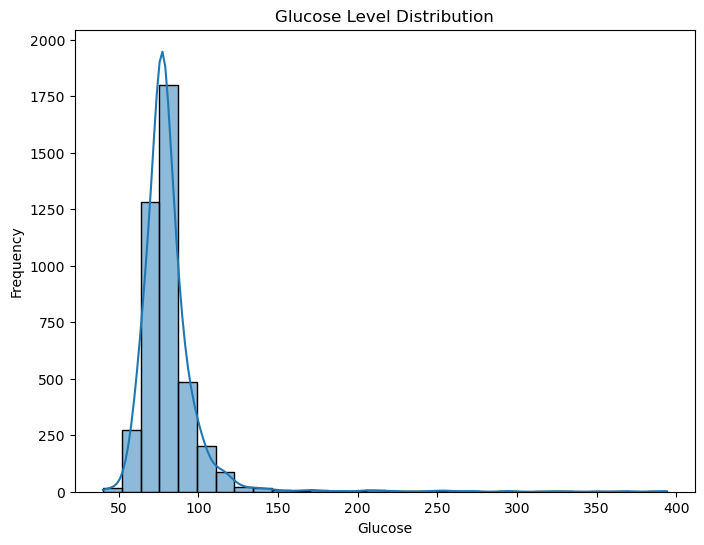

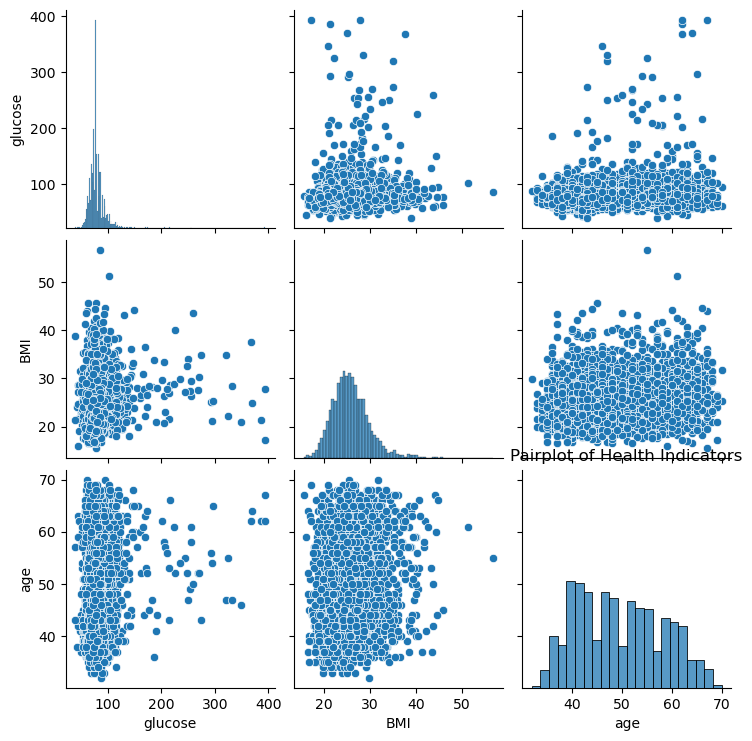

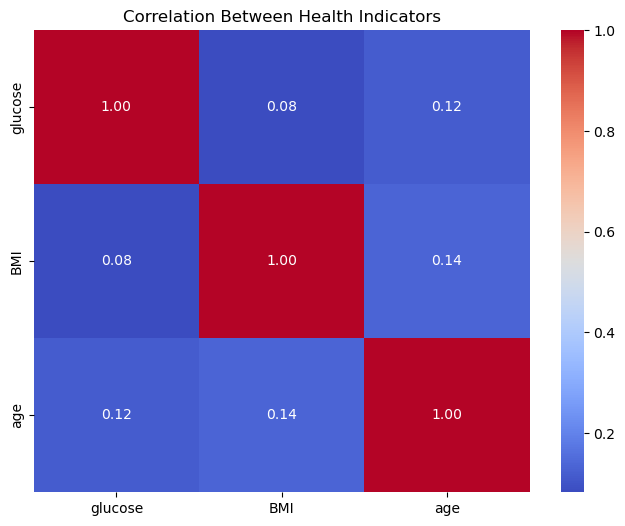

In [22]:
#step 3: visualize glucose and related health indicators
import matplotlib.pyplot as plt
import seaborn as sns

# Identify available columns to avoid KeyErrors
available_cols = [col for col in ["glucose", "BMI", "age"] if col in df.columns]

# Histogram of glucose levels (if available)
if "glucose" in df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df["glucose"], bins=30, kde=True)
    plt.title("Glucose Level Distribution")
    plt.xlabel("Glucose")
    plt.ylabel("Frequency")
    plt.show()

# Pairplot only with available columns
if len(available_cols) > 1:  # Needs at least two features for pairplot
    sns.pairplot(df[available_cols])
    plt.title("Pairplot of Health Indicators")
    plt.show()

# Correlation heatmap with available columns
if len(available_cols) > 1:  # Needs at least two features
    plt.figure(figsize=(8,6))
    sns.heatmap(df[available_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Between Health Indicators")
    plt.show()

In [24]:
#step4: feature selection and engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Identify available features dynamically to avoid KeyErrors
selected_features = [col for col in ["age", "BMI", "glucose", "cholesterol"] if col in df.columns]

# Check if the target variable exists
target_variable = "diabetes"  # Modify this based on your dataset
if target_variable not in df.columns:
    raise KeyError(f"Target variable '{target_variable}' not found in the dataset!")

# Feature selection based on available columns
X = df[selected_features]
y = df[target_variable]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the shape of training and testing datasets
print(f"Train Data Shape: {X_train_scaled.shape}, Test Data Shape: {X_test_scaled.shape}")

Train Data Shape: (3392, 3), Test Data Shape: (848, 3)


In [27]:
# step 5: train ml models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Train models
log_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [28]:
# step 6: Evaluate models
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_pred_tree = tree_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_tree))
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       832
           1       0.89      0.50      0.64        16

    accuracy                           0.99       848
   macro avg       0.94      0.75      0.82       848
weighted avg       0.99      0.99      0.99       848


Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       832
           1       0.32      0.44      0.37        16

    accuracy                           0.97       848
   macro avg       0.65      0.71      0.68       848
weighted avg       0.98      0.97      0.97       848


Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       832
           1       0.62      0.50      0.55        16

    accuracy                           0.98       848
   macro avg       0.80      0.75      0.77       848
weighted avg       0.

In [31]:
# step 7: predict glucose levels and draw insights
# Identify the correct features used in scaling
selected_features = ["age", "BMI", "glucose"]  # Adjust this based on previous feature selection

# Example input: Ensure it matches the number of features used in training
new_data = [[45, 27.5, 130]]  # Remove 'cholesterol' if it wasn't used

# Convert to DataFrame for consistent formatting
import pandas as pd
new_data_df = pd.DataFrame(new_data, columns=selected_features)

# Scale the new data using the previously fitted scaler
new_data_scaled = scaler.transform(new_data_df)

# Predict diabetes likelihood using the trained model
pred_rf = rf_model.predict(new_data_scaled)
print("Predicted diabetes risk:", pred_rf[0])

Predicted diabetes risk: 0


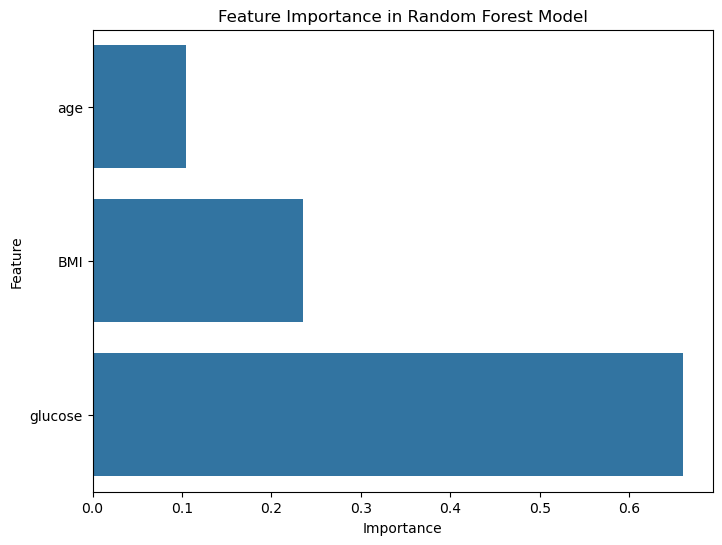

In [32]:
# step 8: visualize important features
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()